In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

We used Excel to clean the original .csv-file. We separated the columns into acutal columns as well as renamed the first column to Index (we might delete this column later on, since the dataset is inherently indexed).

In [2]:
# Loading the dataset into a variable
# ÄNDRADE FRÅN READ_CSV TILL READ_EXCEL PGA .XLSX / Edvin

df = pd.read_excel("diamonds_cleaned.xlsx")

### -= Overview and meta analysis =-

Firstly, let's get an overview of the dataset.

In [7]:
# Using the describe() function to list metadata on the set.

df.describe()

,Index,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


As we can see there are 8 coulumns and about 54'000 rows of data in our chosen set (diamonds.csv). Let's do some more exploring!

In [9]:
# Using the info() to get more basic info about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Now we know the datatypes of each column. This information also indicates that there are no nullvalues in this set. But let's double check that!

In [11]:
# Using the isnull() and sum() functions to check for nullvalues and sum them.

df.isnull().sum()

Index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Now we know for sure that there are no nullvalues in this set.

Let's take a closer look at the acutal data.

In [6]:
# Displaying the first and last 5 rows in the set

df

,Index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Now we have a sense of how the dataset is structured. As we can see there is a column named index, this is a remnant from the original .csv-file and it is pretty unnecessary since the set is indexed in itself.
<br>We could have removed this column when we prepared the dataset in Excel, but we wanted to try removing it using pandas instead.

In [13]:
# Using the drop() function to remove the Index-column from the dataframe. 
# We don't remove it from the actual dataset (not specifing "inplace='True'" as a parameter in the drop-function), it just won't appear for us when we work with the datset within this program.

df.drop('Index', axis=1).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
# FÖRSLAG TILL PLAN FRAMÅT:
# Om vi kan dels ta ut alla varianter av enskilda värden på t ex cut, color och clarity så vi vet vilken som är "bäst" -> "sämst" så kan vi göra correlationer och grafer mot t ex pris.
# Vi kan också skriva en funktion som räknar ut volymen på en sten baserad på x, y och z för att därifrån korrelera mot pris (visserligen kan man hävda att carat i sig är ett mått på vikten och därmed i viss mån av storleken).
#
# Vad tror ni? :) // Edvin

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

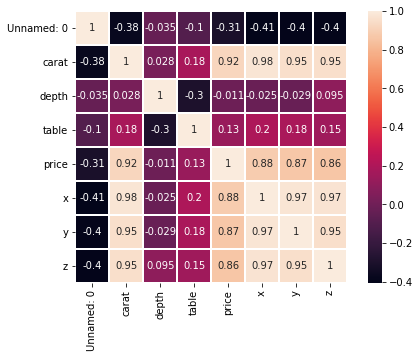

In [5]:
mpl.pyplot.figure(figsize=(7.5,5))
sns.heatmap(correlation,annot=True,linewidths=0.01,vmax=1,square=True,cbar=True)
sns.heatmap

In [ ]:
# using apply method 
df[['B']] = df[['B']].apply(pd.to_numeric)
  
# show the data types
# of all columns
df.dtypes